**Scrap the data, Birthday List, from the Nairaland**



In [91]:
import pandas as pd
import numpy as np
import re
import requests
from bs4 import BeautifulSoup as bs
import seaborn as sns


In [92]:
url ="http://www.nairaland.com/home#featured"
scrapped_data = requests.get(url)
fetched_data = scrapped_data.content
fetched_data

b'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"\n"http://www.w3.org/TR/html4/loose.dtd"><html><head><title>Nairaland Forum</title><meta http-equiv="Content-Type" content="text/html; charset=utf-8"><link href="https://www.nairaland.com/static/nl2.css/49134329965" rel="stylesheet" type="text/css"><link href="/feed" rel="alternate" type="application/rss+xml" title="Nairaland"><meta name="google-site-verification" content="KUABan1rWBhK3Jb2LePxHAv00FEbbM1wQMAAgsN-EyA"></head><body><div class="body"><table summary="" id=up><tr><td class=grad><h1><a href="https://www.nairaland.com/?" class=g title="Nairaland Nigerian Forum">\xe2\x82\xa6airaland Forum</a></h1> Welcome, <b>Guest</b>: <a href="/register">Join Nairaland</a> / <b><a href="/login">LOGIN!</a></b> / <a href="/trending">Trending</a> / <a href="/recent">Recent</a> / <a href="/topics">New</a><br><b>Stats: </b>2,043,040 members, 4,382,276 topics. <b>Date</b>: Monday, 30 July 2018 at 09:43 AM<p><form action="/search"> <in

In [93]:
soup = bs(fetched_data, 'lxml')
soup

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html><head><title>Nairaland Forum</title><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><link href="https://www.nairaland.com/static/nl2.css/49134329965" rel="stylesheet" type="text/css"/><link href="/feed" rel="alternate" title="Nairaland" type="application/rss+xml"/><meta content="KUABan1rWBhK3Jb2LePxHAv00FEbbM1wQMAAgsN-EyA" name="google-site-verification"/></head><body><div class="body"><table id="up" summary=""><tr><td class="grad"><h1><a class="g" href="https://www.nairaland.com/?" title="Nairaland Nigerian Forum">₦airaland Forum</a></h1> Welcome, <b>Guest</b>: <a href="/register">Join Nairaland</a> / <b><a href="/login">LOGIN!</a></b> / <a href="/trending">Trending</a> / <a href="/recent">Recent</a> / <a href="/topics">New</a><br/><b>Stats: </b>2,043,040 members, 4,382,276 topics. <b>Date</b>: Monday, 30 July 2018 at 09:43 AM<p></p><form action="/search"> <

In [94]:
for data in soup('td'):
    print(data.text)

₦airaland Forum Welcome, Guest: Join Nairaland / LOGIN! / Trending / Recent / NewStats: 2,043,040 members, 4,382,276 topics. Date: Monday, 30 July 2018 at 09:43 AM 
 
Nairaland / General: Politics, Crime, Romance, Jobs/Vacancies, Career, Business, Investment, NYSC, Education, Autos, Car Talk, Properties, Health, Travel, Family, Culture, Religion, Food, Diaries, Nairaland Ads, Pets, Agriculture
Entertainment: Jokes Etc, TV/Movies, Music/Radio, Celebrities, Fashion, Events, Sports, Gaming, Forum Games, Literature
Science/Technology: Programming, Webmasters, Computers, Phones, Art, Graphics & Video, Technology Market
 Featured Links / Twitter  / Facebook  / How To Advertise 
 » Husband Cries Out As His Wife Delivers Quintuplet (Photo) «» Armed Security Men Takes Over Benue House Of Assembly «» Iyabo Ojo’s Kids Excited After Seeing Their Dad For The First Time In 6 Years «» Reps Caution APC Over Plan To Remove Dogara «» Ekiti State Releases Allocation Details From Federation Account For Ju

**Extract Usernames and their Ages and Analyzing the data**


In [95]:
member_found = None

re_match = "[\w]+\([\d]+\)"

for data in soup.findAll('td'):
    text = re.findall(re_match, data.text)
    if text:
        member_found = text
print(member_found)

['muredo(34)', 'dearie(37)', 'kingralph(40)', 'jabbo(37)', 'Ajibolar(28)', 'Agbo2(38)', 'brosibro(31)', 'extommix(33)', 'real2fix(29)', 'adosjun(18)', 'worldfamouz(48)', 'agbeabiodu(30)', 'Lataability(32)', 'ALARAPE22(30)', 'stanlotion(43)', 'Prince2bad(25)', 'Bunnatex(25)', 'Tekecoms1(31)', 'vicky6(38)', 'dedonfranco(34)', 'Mzstephii(25)', 'usmanktg2(24)', 'Izukel(37)', 'kwaraguy(29)', 'Babcee(31)', 'ifeanyi83(35)', 'choclatoria(29)', 'haybellfire(22)', 'yousouphe(25)', 'Deeworld(22)', 'nigmarelli(36)', 'demmyhandsome(25)', 'fidel3431(27)', 'McGg(26)', 'ysadiq(24)', 'Sleekyshuga(25)', 'ilynem(28)', 'Zanders(30)', 'stmoriz(28)', 'okemayokun(28)', 'McPerry(31)', 'Fianze93(25)', 'Samjos01(29)', 'Ekinne91(27)', 'unikprince(32)', 'steph2sweet(24)', 'MacMillz(31)', 'morichy(28)', 'dawno2008(38)', 'bukkysam(19)', 'olasstech(25)', 'yungelboi(23)', 'laxxie(36)', 'princewaldex(21)', 'mic3221(34)', 'Longhite01(25)', 'CHANNELStv2020(25)', 'kbitss(30)', 'BigboysZ(24)', 'Flywillz93(27)', 'olusholas

In [96]:
for x in member_found:
    member_replaced = [x.replace(")", "")]
    for y in member_replaced:
        member_cleaned = y.split('(')
    print(member_cleaned)

['muredo', '34']
['dearie', '37']
['kingralph', '40']
['jabbo', '37']
['Ajibolar', '28']
['Agbo2', '38']
['brosibro', '31']
['extommix', '33']
['real2fix', '29']
['adosjun', '18']
['worldfamouz', '48']
['agbeabiodu', '30']
['Lataability', '32']
['ALARAPE22', '30']
['stanlotion', '43']
['Prince2bad', '25']
['Bunnatex', '25']
['Tekecoms1', '31']
['vicky6', '38']
['dedonfranco', '34']
['Mzstephii', '25']
['usmanktg2', '24']
['Izukel', '37']
['kwaraguy', '29']
['Babcee', '31']
['ifeanyi83', '35']
['choclatoria', '29']
['haybellfire', '22']
['yousouphe', '25']
['Deeworld', '22']
['nigmarelli', '36']
['demmyhandsome', '25']
['fidel3431', '27']
['McGg', '26']
['ysadiq', '24']
['Sleekyshuga', '25']
['ilynem', '28']
['Zanders', '30']
['stmoriz', '28']
['okemayokun', '28']
['McPerry', '31']
['Fianze93', '25']
['Samjos01', '29']
['Ekinne91', '27']
['unikprince', '32']
['steph2sweet', '24']
['MacMillz', '31']
['morichy', '28']
['dawno2008', '38']
['bukkysam', '19']
['olasstech', '25']
['yungelboi'

In [97]:
member_dict = {}

for x in member_found:
    member_replaced = [x.replace(")", "")]
    for y in member_replaced:
        member_cleaned = y.split('(')
        member_dict[member_cleaned[0]] = int(member_cleaned[1])
        
print(member_dict)

{'muredo': 34, 'dearie': 37, 'kingralph': 40, 'jabbo': 37, 'Ajibolar': 28, 'Agbo2': 38, 'brosibro': 31, 'extommix': 33, 'real2fix': 29, 'adosjun': 18, 'worldfamouz': 48, 'agbeabiodu': 30, 'Lataability': 32, 'ALARAPE22': 30, 'stanlotion': 43, 'Prince2bad': 25, 'Bunnatex': 25, 'Tekecoms1': 31, 'vicky6': 38, 'dedonfranco': 34, 'Mzstephii': 25, 'usmanktg2': 24, 'Izukel': 37, 'kwaraguy': 29, 'Babcee': 31, 'ifeanyi83': 35, 'choclatoria': 29, 'haybellfire': 22, 'yousouphe': 25, 'Deeworld': 22, 'nigmarelli': 36, 'demmyhandsome': 25, 'fidel3431': 27, 'McGg': 26, 'ysadiq': 24, 'Sleekyshuga': 25, 'ilynem': 28, 'Zanders': 30, 'stmoriz': 28, 'okemayokun': 28, 'McPerry': 31, 'Fianze93': 25, 'Samjos01': 29, 'Ekinne91': 27, 'unikprince': 32, 'steph2sweet': 24, 'MacMillz': 31, 'morichy': 28, 'dawno2008': 38, 'bukkysam': 19, 'olasstech': 25, 'yungelboi': 23, 'laxxie': 36, 'princewaldex': 21, 'mic3221': 34, 'Longhite01': 25, 'CHANNELStv2020': 25, 'kbitss': 30, 'BigboysZ': 24, 'Flywillz93': 27, 'olusholas

In [98]:
nairaland = pd.DataFrame(list(member_dict.items()), columns=["Username", "Age"])
nairaland

,Username,Age
0,muredo,34
1,dearie,37
2,kingralph,40
3,jabbo,37
4,Ajibolar,28
5,Agbo2,38
6,brosibro,31
7,extommix,33
8,real2fix,29
9,adosjun,18


In [99]:
from datetime import datetime

todays_date = datetime.now().date()
nairaland["Date"] = todays_date

nairaland

,Username,Age,Date
0,muredo,34,2018-07-30
1,dearie,37,2018-07-30
2,kingralph,40,2018-07-30
3,jabbo,37,2018-07-30
4,Ajibolar,28,2018-07-30
5,Agbo2,38,2018-07-30
6,brosibro,31,2018-07-30
7,extommix,33,2018-07-30
8,real2fix,29,2018-07-30
9,adosjun,18,2018-07-30


In [100]:
csv_name = todays_date.strftime("%Y%m%d")
nairaland.to_csv(csv_name + ".csv")

In [101]:
nairaland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 3 columns):
Username    85 non-null object
Age         85 non-null int64
Date        85 non-null object
dtypes: int64(1), object(2)
memory usage: 2.1+ KB


In [102]:
nairaland.describe()

,Age
count,85.000000
mean,28.611765
std,5.910229
min,18.000000
25%,25.000000
50%,28.000000
75%,32.000000
max,48.000000


In [103]:
nairaland['Username'].describe()

count           85
unique          85
top       MacMillz
freq             1
Name: Username, dtype: object

In [104]:
nairaland.sort_values(by='Age', ascending=False).head(10)

,Username,Age,Date
10,worldfamouz,48,2018-07-30
14,stanlotion,43,2018-07-30
2,kingralph,40,2018-07-30
60,olusholasalami,39,2018-07-30
48,dawno2008,38,2018-07-30
5,Agbo2,38,2018-07-30
18,vicky6,38,2018-07-30
3,jabbo,37,2018-07-30
22,Izukel,37,2018-07-30
1,dearie,37,2018-07-30


In [105]:
nairaland.sort_values(by='Age', ascending=True).head(10)

,Username,Age,Date
80,Dammysammyy19,18,2018-07-30
9,adosjun,18,2018-07-30
63,Horlahmi,19,2018-07-30
49,bukkysam,19,2018-07-30
66,Awafolashade,20,2018-07-30
72,Wizklynd23,20,2018-07-30
53,princewaldex,21,2018-07-30
84,Judeosho,21,2018-07-30
27,haybellfire,22,2018-07-30
29,Deeworld,22,2018-07-30


In [106]:
nairaland['Age'].max()

48

**Celebrants Ages in 10 years**

In [107]:
nairaland['Age_plus_10'] = nairaland['Age'] + 10
nairaland

,Username,Age,Date,Age_plus_10
0,muredo,34,2018-07-30,44
1,dearie,37,2018-07-30,47
2,kingralph,40,2018-07-30,50
3,jabbo,37,2018-07-30,47
4,Ajibolar,28,2018-07-30,38
5,Agbo2,38,2018-07-30,48
6,brosibro,31,2018-07-30,41
7,extommix,33,2018-07-30,43
8,real2fix,29,2018-07-30,39
9,adosjun,18,2018-07-30,28


**Celebrants Age when Nairaland was established**

In [108]:
nairaland['Age_at_2005'] = nairaland['Age'] - 13
nairaland.sort_values(by='Age', ascending=True)

,Username,Age,Date,Age_plus_10,Age_at_2005
80,Dammysammyy19,18,2018-07-30,28,5
9,adosjun,18,2018-07-30,28,5
63,Horlahmi,19,2018-07-30,29,6
49,bukkysam,19,2018-07-30,29,6
66,Awafolashade,20,2018-07-30,30,7
72,Wizklynd23,20,2018-07-30,30,7
53,princewaldex,21,2018-07-30,31,8
84,Judeosho,21,2018-07-30,31,8
27,haybellfire,22,2018-07-30,32,9
29,Deeworld,22,2018-07-30,32,9


In [109]:
youngest_10 = nairaland.sort_values(by='Age', ascending=True).head(10)
youngest_10

,Username,Age,Date,Age_plus_10,Age_at_2005
80,Dammysammyy19,18,2018-07-30,28,5
9,adosjun,18,2018-07-30,28,5
63,Horlahmi,19,2018-07-30,29,6
49,bukkysam,19,2018-07-30,29,6
66,Awafolashade,20,2018-07-30,30,7
72,Wizklynd23,20,2018-07-30,30,7
53,princewaldex,21,2018-07-30,31,8
84,Judeosho,21,2018-07-30,31,8
27,haybellfire,22,2018-07-30,32,9
29,Deeworld,22,2018-07-30,32,9


**Visualizing the Data with different plots**

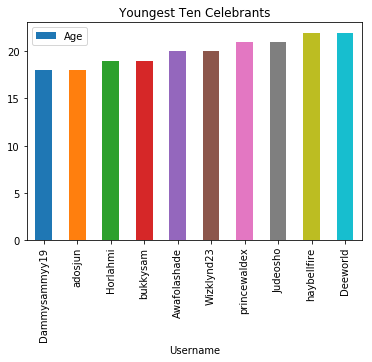

In [110]:
youngest_10.plot(x = 'Username', y='Age', kind='bar', title="Youngest Ten Celebrants")

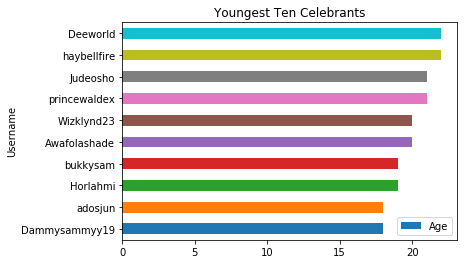

In [111]:
youngest_10.plot(x='Username', y='Age', kind='barh', title='Youngest Ten Celebrants')

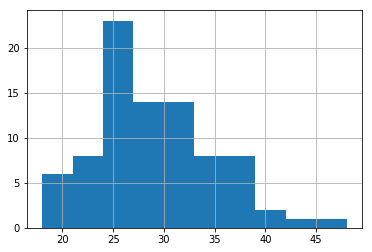

In [112]:
nairaland['Age'].hist()

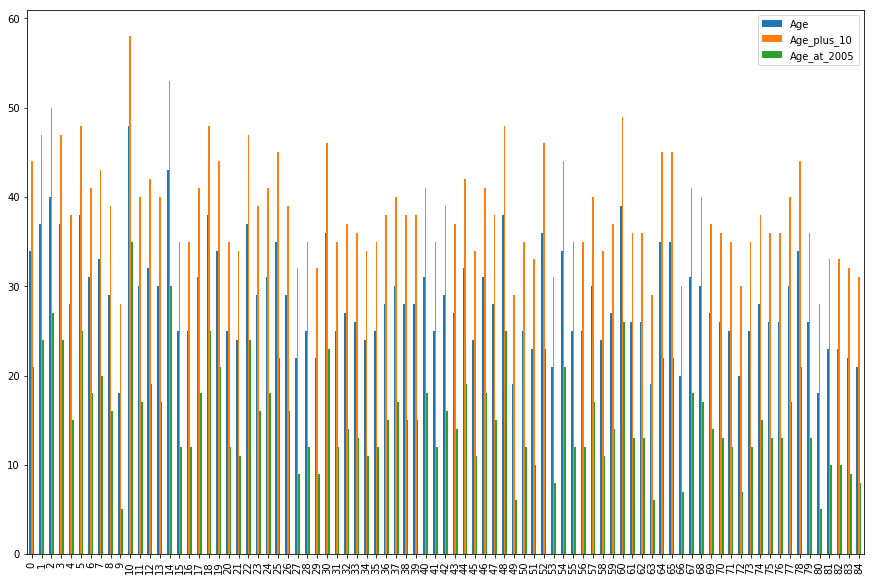

In [113]:
nairaland.plot(kind='bar', figsize=(15,10))

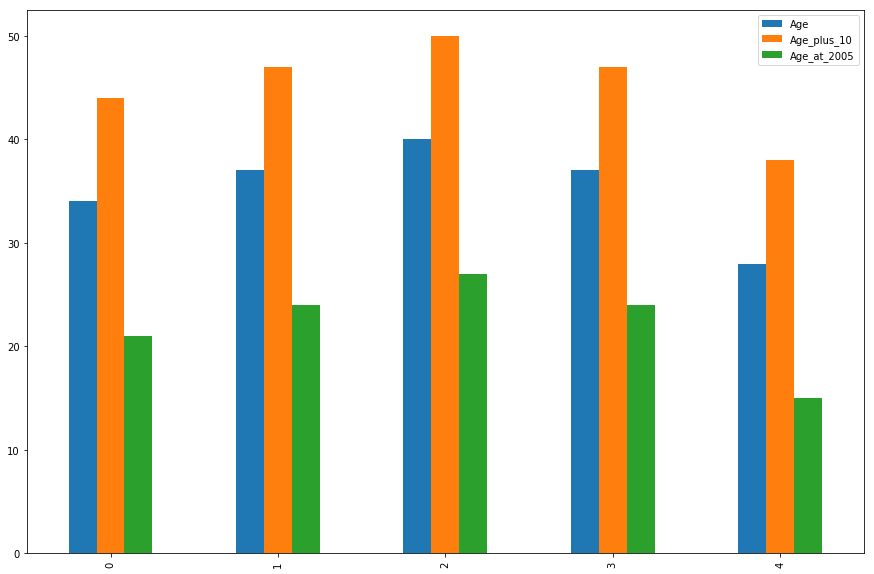

In [114]:
nairaland5 = nairaland.head()
nairaland5.plot(kind='bar', figsize = (15,10))

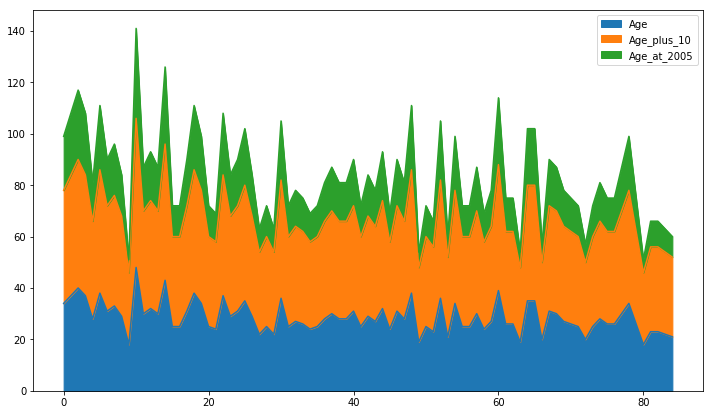

In [115]:
nairaland.plot(kind='area', figsize=(12, 7))

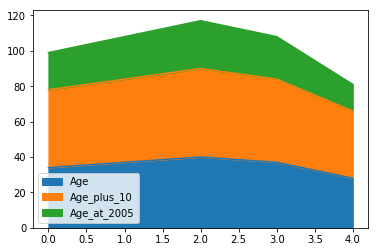

In [116]:
import matplotlib.pyplot as plt

nairaland5.plot(kind='area')

plt.show()

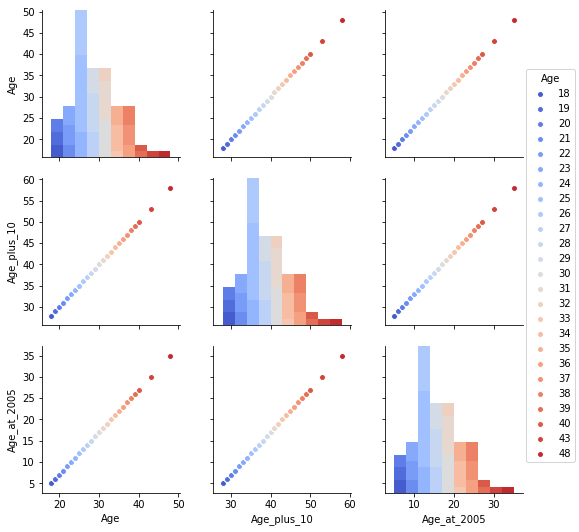

In [117]:
sns.pairplot(nairaland, hue='Age', palette='coolwarm')

In [118]:
youngest_10['Percentage'] = (youngest_10["Age"] * 100) / youngest_10["Age"].sum()
youngest_10

,Username,Age,Date,Age_plus_10,Age_at_2005,Percentage
80,Dammysammyy19,18,2018-07-30,28,5,9.0
9,adosjun,18,2018-07-30,28,5,9.0
63,Horlahmi,19,2018-07-30,29,6,9.5
49,bukkysam,19,2018-07-30,29,6,9.5
66,Awafolashade,20,2018-07-30,30,7,10.0
72,Wizklynd23,20,2018-07-30,30,7,10.0
53,princewaldex,21,2018-07-30,31,8,10.5
84,Judeosho,21,2018-07-30,31,8,10.5
27,haybellfire,22,2018-07-30,32,9,11.0
29,Deeworld,22,2018-07-30,32,9,11.0


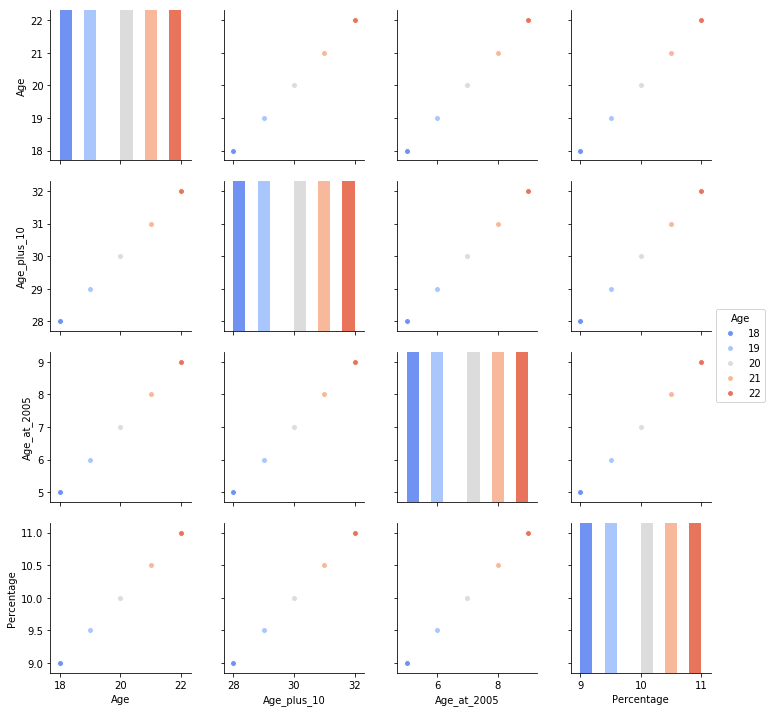

In [119]:
sns.pairplot(youngest_10, hue='Age', palette='coolwarm')

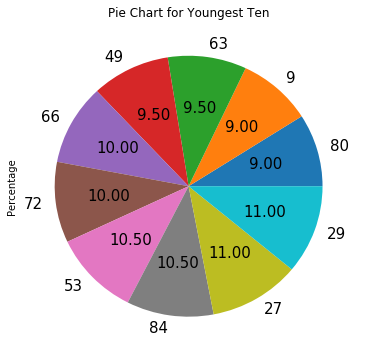

In [120]:
youngest_10["Percentage"].plot(kind='pie', autopct='%.2f', fontsize = 15, figsize = (6,6), title="Pie Chart for Youngest Ten")

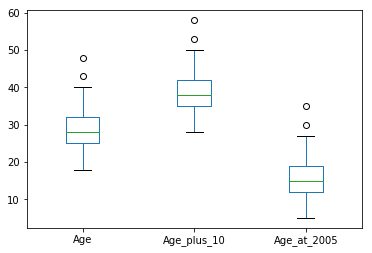

In [121]:
nairaland.plot(kind='box')

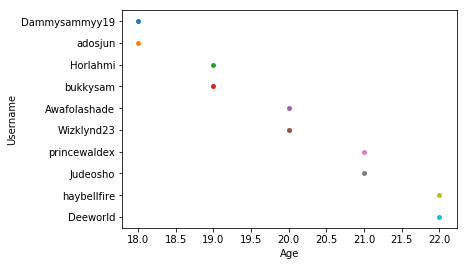

In [122]:
sns.stripplot(x='Age', y='Username', data=youngest_10)

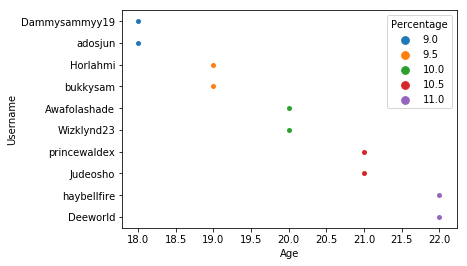

In [123]:
sns.stripplot(x='Age', y='Username', data=youngest_10, hue='Percentage')

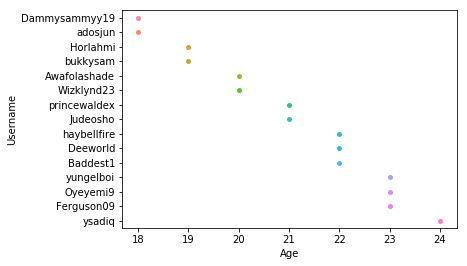

In [124]:
sns.swarmplot(x='Age', y='Username', data=nairaland.sort_values(by='Age', ascending=True).head(15))

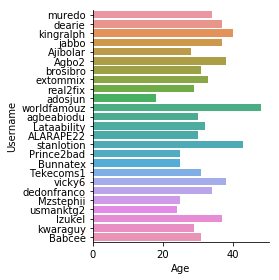

In [125]:
sns.factorplot(x='Age', y='Username', data=nairaland.head(25), kind='bar')

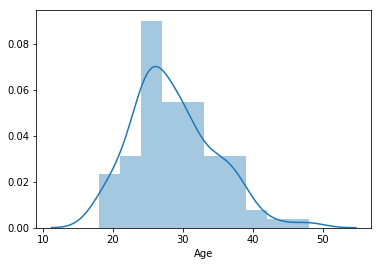

In [126]:
sns.distplot(nairaland['Age'])

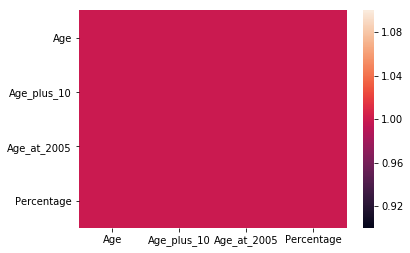

In [127]:
sns.heatmap(youngest_10.corr())